In [71]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [72]:
data_dir = 'data' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [73]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [74]:
data = tf.keras.utils.image_dataset_from_directory('data')

preprocessed_data = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=data_dir, target_size=(224,224), classes=['happy', 'sad'], batch_size=32)

Found 305 files belonging to 2 classes.
Found 305 images belonging to 2 classes.


In [75]:
data_iterator = data.as_numpy_iterator()

In [76]:
batch = data_iterator.next()

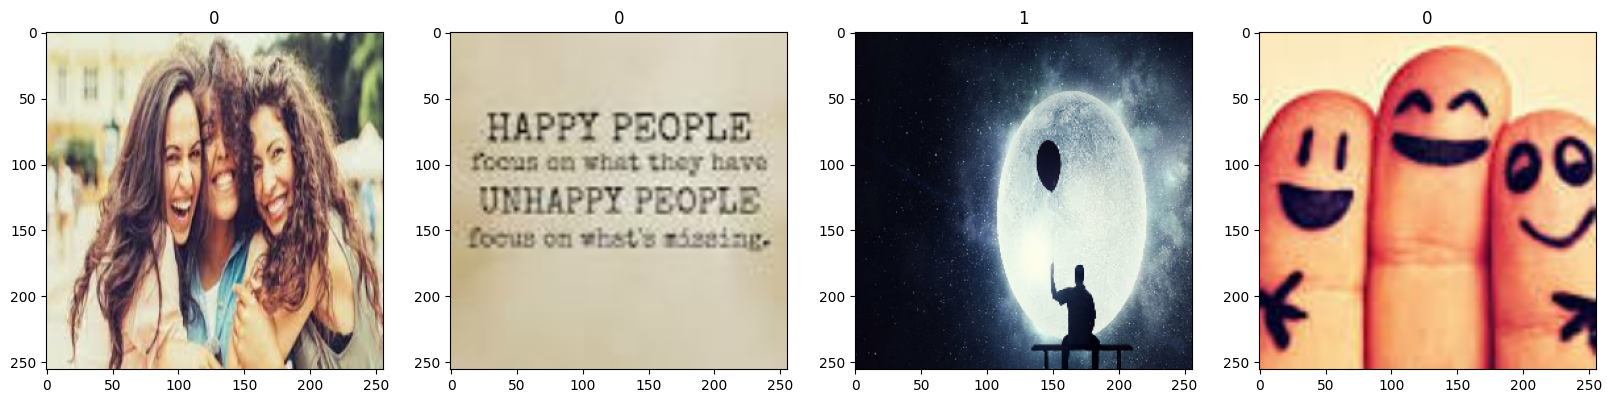

In [77]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [78]:
data = data.map(lambda x,y: (x/255, y))

In [79]:
data.as_numpy_iterator().next()

(array([[[[0.21176471, 0.35686275, 0.43137255],
          [0.21176471, 0.35686275, 0.43137255],
          [0.21176471, 0.35686275, 0.43137255],
          ...,
          [0.19154412, 0.34448528, 0.41115198],
          [0.19571078, 0.34865198, 0.41531864],
          [0.19607843, 0.34901962, 0.41568628]],
 
         [[0.20947458, 0.35457262, 0.42908242],
          [0.20947458, 0.35457262, 0.42908242],
          [0.20947458, 0.35457262, 0.42908242],
          ...,
          [0.19154412, 0.34448528, 0.41115198],
          [0.19571078, 0.34865198, 0.41531864],
          [0.19607843, 0.34901962, 0.41568628]],
 
         [[0.20904565, 0.35173866, 0.42745098],
          [0.20904565, 0.35173866, 0.42745098],
          [0.20904565, 0.35173866, 0.42745098],
          ...,
          [0.19154412, 0.34448528, 0.41115198],
          [0.19462101, 0.3475622 , 0.41422886],
          [0.19604085, 0.34898204, 0.4156487 ]],
 
         ...,
 
         [[0.3279802 , 0.15039206, 0.0564185 ],
          [0.33098

In [80]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [81]:
train_size

7

In [82]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)